# Problem Statement:
Extract reviews of any product from ecommerce website like amazon
Perform emotion mining

In [28]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [29]:
# Import extracted amazon reviews Dataset
import pandas as pd
reviews=pd.read_csv("AllProductReviews.csv")
reviews

ReviewTitle  \
0                Honest review of an edm music lover\n   
1                Unreliable earphones with high cost\n   
2                           Really good and durable.\n   
3                    stopped working in just 14 days\n   
4     Just Awesome Wireless Headphone under 1000...😉\n   
...                                                ...   
9965                                               NaN   
9966                                               NaN   
9967                                               NaN   
9968                                               NaN   
9969                                               NaN   

                                             ReviewBody  ReviewStar  \
0     No doubt it has a great bass and to a great ex...         3.0   
1     This  earphones are unreliable, i bought it be...         1.0   
2     i bought itfor 999,I purchased it second time,...         4.0   
3     Its sound quality is adorable. overall it was ...         1.0   
4     Its Awesome... Good sound quality & 8-9 hrs ba...         5.0   
...                                                 ...         ...   
9965                                                NaN         NaN   
9966                                                NaN         NaN   
9967                                                NaN         NaN   
9968                                                NaN         NaN   
9969                                                NaN         NaN   

               Product  
0     boAt Rockerz 255  
1     boAt Rockerz 255  
2     boAt Rockerz 255  
3     boAt Rockerz 255  
4     boAt Rockerz 255  
...                ...  
9965               NaN  
9966               NaN  
9967               NaN  
9968               NaN  
9969               NaN  

[9970 rows x 4 columns]

In [30]:
reviews.drop(columns =['ReviewTitle', 'Product'],inplace=True)


In [31]:
reviews.dropna(inplace=True)

In [32]:
reviews.rename(columns = {'ReviewBody':'comment','ReviewStar':'stars'}, inplace = True)

In [33]:
reviews.head()

comment  stars
0  No doubt it has a great bass and to a great ex...    3.0
1  This  earphones are unreliable, i bought it be...    1.0
2  i bought itfor 999,I purchased it second time,...    4.0
3  Its sound quality is adorable. overall it was ...    1.0
4  Its Awesome... Good sound quality & 8-9 hrs ba...    5.0

### Text Preprocessing

In [34]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice.',
 'This  earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying\u200b this unreliable product.Thanks.',
 'i bought itfor 999,I purchased it second time, gifted first one to brother. This is really good.Sound quality is really good.You can connect 2 devices at a time.I connect 

In [35]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:2000]

"No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice. This  earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying\u200b this unreliable product.Thanks. i bought itfor 999,I purchased it second time, gifted first one to brother. This is really good.Sound quality is really good.You can connect 2 devices at a time.I connect laptop an

In [36]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[0:2000]

'No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust1Bluetooth range not more than 10m2 Pain in ear due the conical budscan be removed3 Wires are a bit long which makes it odd in front4 No pouch provided5 Worst part is very low quality and distoring mic Other person keeps complaining about my voice This  earphones are unreliable i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts and sound quality is also not that much good but ok one more thing bass is not good as it is a boat earphonesGuysAlso for the proof i have attached picsPlease see and think before buying\u200b this unreliable productThanks i bought itfor 999I purchased it second time gifted first one to brother This is really goodSound quality is really goodYou can connect 2 devices at a timeI connect laptop and mobile bothwhen listeni

In [37]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRASH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRASH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['No', 'doubt', 'it', 'has', 'a', 'great', 'bass', 'and', 'to', 'a', 'great', 'extent', 'noise', 'cancellation', 'and', 'decent', 'sound', 'clarity', 'and', 'mindblowing', 'battery', 'but', 'the', 'following', 'dissapointed', 'me', 'though', 'i', 'tried', 'a', 'lot', 'to', 'adjust1Bluetooth', 'range', 'not', 'more', 'than', '10m2', 'Pain', 'in', 'ear', 'due', 'the', 'conical', 'budscan', 'be', 'removed3', 'Wires', 'are', 'a']


In [39]:
len(text_tokens)

164136

In [40]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:500])

['No', 'doubt', 'great', 'bass', 'great', 'extent', 'noise', 'cancellation', 'decent', 'sound', 'clarity', 'mindblowing', 'battery', 'following', 'dissapointed', 'though', 'tried', 'lot', 'adjust1Bluetooth', 'range', '10m2', 'Pain', 'ear', 'due', 'conical', 'budscan', 'removed3', 'Wires', 'bit', 'long', 'makes', 'odd', 'front4', 'No', 'pouch', 'provided5', 'Worst', 'part', 'low', 'quality', 'distoring', 'mic', 'Other', 'person', 'keeps', 'complaining', 'voice', 'This', 'earphones', 'unreliable', 'bought', '15', 'days', 'meanwhile', 'right', 'side', 'ear', 'buds', 'got', 'cracked', 'automatically', 'got', 'divided', 'two', 'parts', 'sound', 'quality', 'also', 'much', 'good', 'ok', 'one', 'thing', 'bass', 'good', 'boat', 'earphonesGuysAlso', 'proof', 'attached', 'picsPlease', 'see', 'think', 'buying\u200b', 'unreliable', 'productThanks', 'bought', 'itfor', '999I', 'purchased', 'second', 'time', 'gifted', 'first', 'one', 'brother', 'This', 'really', 'goodSound', 'quality', 'really', 'good

In [41]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words[0:500])

['no', 'doubt', 'great', 'bass', 'great', 'extent', 'noise', 'cancellation', 'decent', 'sound', 'clarity', 'mindblowing', 'battery', 'following', 'dissapointed', 'though', 'tried', 'lot', 'adjust1bluetooth', 'range', '10m2', 'pain', 'ear', 'due', 'conical', 'budscan', 'removed3', 'wires', 'bit', 'long', 'makes', 'odd', 'front4', 'no', 'pouch', 'provided5', 'worst', 'part', 'low', 'quality', 'distoring', 'mic', 'other', 'person', 'keeps', 'complaining', 'voice', 'this', 'earphones', 'unreliable', 'bought', '15', 'days', 'meanwhile', 'right', 'side', 'ear', 'buds', 'got', 'cracked', 'automatically', 'got', 'divided', 'two', 'parts', 'sound', 'quality', 'also', 'much', 'good', 'ok', 'one', 'thing', 'bass', 'good', 'boat', 'earphonesguysalso', 'proof', 'attached', 'picsplease', 'see', 'think', 'buying\u200b', 'unreliable', 'productthanks', 'bought', 'itfor', '999i', 'purchased', 'second', 'time', 'gifted', 'first', 'one', 'brother', 'this', 'really', 'goodsound', 'quality', 'really', 'good

In [42]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:500])

['no', 'doubt', 'great', 'bass', 'great', 'extent', 'nois', 'cancel', 'decent', 'sound', 'clariti', 'mindblow', 'batteri', 'follow', 'dissapoint', 'though', 'tri', 'lot', 'adjust1bluetooth', 'rang', '10m2', 'pain', 'ear', 'due', 'conic', 'budscan', 'removed3', 'wire', 'bit', 'long', 'make', 'odd', 'front4', 'no', 'pouch', 'provided5', 'worst', 'part', 'low', 'qualiti', 'distor', 'mic', 'other', 'person', 'keep', 'complain', 'voic', 'thi', 'earphon', 'unreli', 'bought', '15', 'day', 'meanwhil', 'right', 'side', 'ear', 'bud', 'got', 'crack', 'automat', 'got', 'divid', 'two', 'part', 'sound', 'qualiti', 'also', 'much', 'good', 'ok', 'one', 'thing', 'bass', 'good', 'boat', 'earphonesguysalso', 'proof', 'attach', 'picspleas', 'see', 'think', 'buying\u200b', 'unreli', 'productthank', 'bought', 'itfor', '999i', 'purchas', 'second', 'time', 'gift', 'first', 'one', 'brother', 'thi', 'realli', 'goodsound', 'qualiti', 'realli', 'goodyou', 'connect', '2', 'devic', 'timei', 'connect', 'laptop', 'mo

In [43]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[0:2000])

no doubt great bass great extent noise cancellation decent sound clarity mindblowing battery following dissapointed though tried lot adjust1bluetooth range 10m2 pain ear due conical budscan removed3 wires bit long makes odd front4 no pouch provided5 worst part low quality distoring mic other person keeps complaining voice this earphones unreliable bought 15 days meanwhile right side ear buds got cracked automatically got divided two parts sound quality also much good ok one thing bass good boat earphonesguysalso proof attached picsplease see think buying​ unreliable productthanks bought itfor 999i purchased second time gifted first one brother this really goodsound quality really goodyou connect 2 devices timei connect laptop mobile bothwhen listening muaic lappy u get call switches mobilethis switch device good price awesomebattery stand 36 hours used continously 8 hours one go so battery life pretty awesomecomfortable ear its sound quality adorable overall good 2 weeks stopped workin

In [44]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:500])

['no', 'doubt', 'great', 'bass', 'great', 'extent', 'noise', 'cancellation', 'decent', 'sound', 'clarity', 'mindblowe', 'battery', 'follow', 'dissapointe', 'though', 'try', 'lot', 'adjust1bluetooth', 'range', '10m2', 'pain', 'ear', 'due', 'conical', 'budscan', 'removed3', 'wire', 'bite', 'long', 'make', 'odd', 'front4', 'no', 'pouch', 'provided5', 'bad', 'part', 'low', 'quality', 'distore', 'mic', 'other', 'person', 'keep', 'complain', 'voice', 'this', 'earphone', 'unreliable', 'buy', '15', 'day', 'meanwhile', 'right', 'side', 'ear', 'bud', 'got', 'crack', 'automatically', 'got', 'divide', 'two', 'part', 'sound', 'quality', 'also', 'much', 'good', 'ok', 'one', 'thing', 'bass', 'good', 'boat', 'earphonesguysalso', 'proof', 'attach', 'picsplease', 'see', 'think', 'buying\u200b', 'unreliable', 'productthank', 'buy', 'itfor', '999i', 'purchase', 'second', 'time', 'gift', 'first', 'one', 'brother', 'this', 'really', 'goodsound', 'quality', 'really', 'goodyou', 'connect', '2', 'device', 'tim

In [45]:
clean_reviews=' '.join(lemmas)
clean_reviews[0:2000]

'no doubt great bass great extent noise cancellation decent sound clarity mindblowe battery follow dissapointe though try lot adjust1bluetooth range 10m2 pain ear due conical budscan removed3 wire bite long make odd front4 no pouch provided5 bad part low quality distore mic other person keep complain voice this earphone unreliable buy 15 day meanwhile right side ear bud got crack automatically got divide two part sound quality also much good ok one thing bass good boat earphonesguysalso proof attach picsplease see think buying\u200b unreliable productthank buy itfor 999i purchase second time gift first one brother this really goodsound quality really goodyou connect 2 device timei connect laptop mobile bothwhen listen muaic lappy u get call switch mobilethis switch device good price awesomebattery stand 36 hour use continously 8 hour one go so battery life pretty awesomecomfortable ear its sound quality adorable overall good 2 week stop work since never power claim warrenty still under

# Feature Extaction

## 1. Using CountVectorizer

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [47]:
print(cv.vocabulary_)

{'no': 5634, 'doubt': 2775, 'great': 3858, 'bass': 1274, 'extent': 3291, 'noise': 5638, 'cancellation': 1808, 'decent': 2473, 'sound': 7682, 'clarity': 2011, 'mindblowe': 5279, 'battery': 1344, 'follow': 3533, 'dissapointe': 2710, 'though': 8232, 'try': 8440, 'lot': 4980, 'adjust1bluetooth': 685, 'range': 6825, '10m2': 44, 'pain': 6020, 'ear': 2859, 'due': 2820, 'conical': 2193, 'budscan': 1679, 'removed3': 6991, 'wire': 8976, 'bite': 1504, 'long': 4938, 'make': 5083, 'odd': 5736, 'front4': 3607, 'pouch': 6327, 'provided5': 6617, 'bad': 1202, 'part': 6055, 'low': 5025, 'quality': 6676, 'distore': 2719, 'mic': 5244, 'other': 5929, 'person': 6144, 'keep': 4710, 'complain': 2152, 'voice': 8740, 'this': 8202, 'earphone': 2900, 'unreliable': 8546, 'buy': 1723, '15': 98, 'day': 2417, 'meanwhile': 5176, 'right': 7120, 'side': 7497, 'bud': 1668, 'got': 3845, 'crack': 2335, 'automatically': 1033, 'divide': 2740, 'two': 8463, 'also': 790, 'much': 5479, 'good': 3723, 'ok': 5765, 'one': 5817, 'thi

In [48]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [49]:
print(reviewscv.toarray().shape)

(100783, 9176)


## 2. TF-IDF Vectorizer

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [54]:
print(tfidf_matrix_ngram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Generate Word Cloud

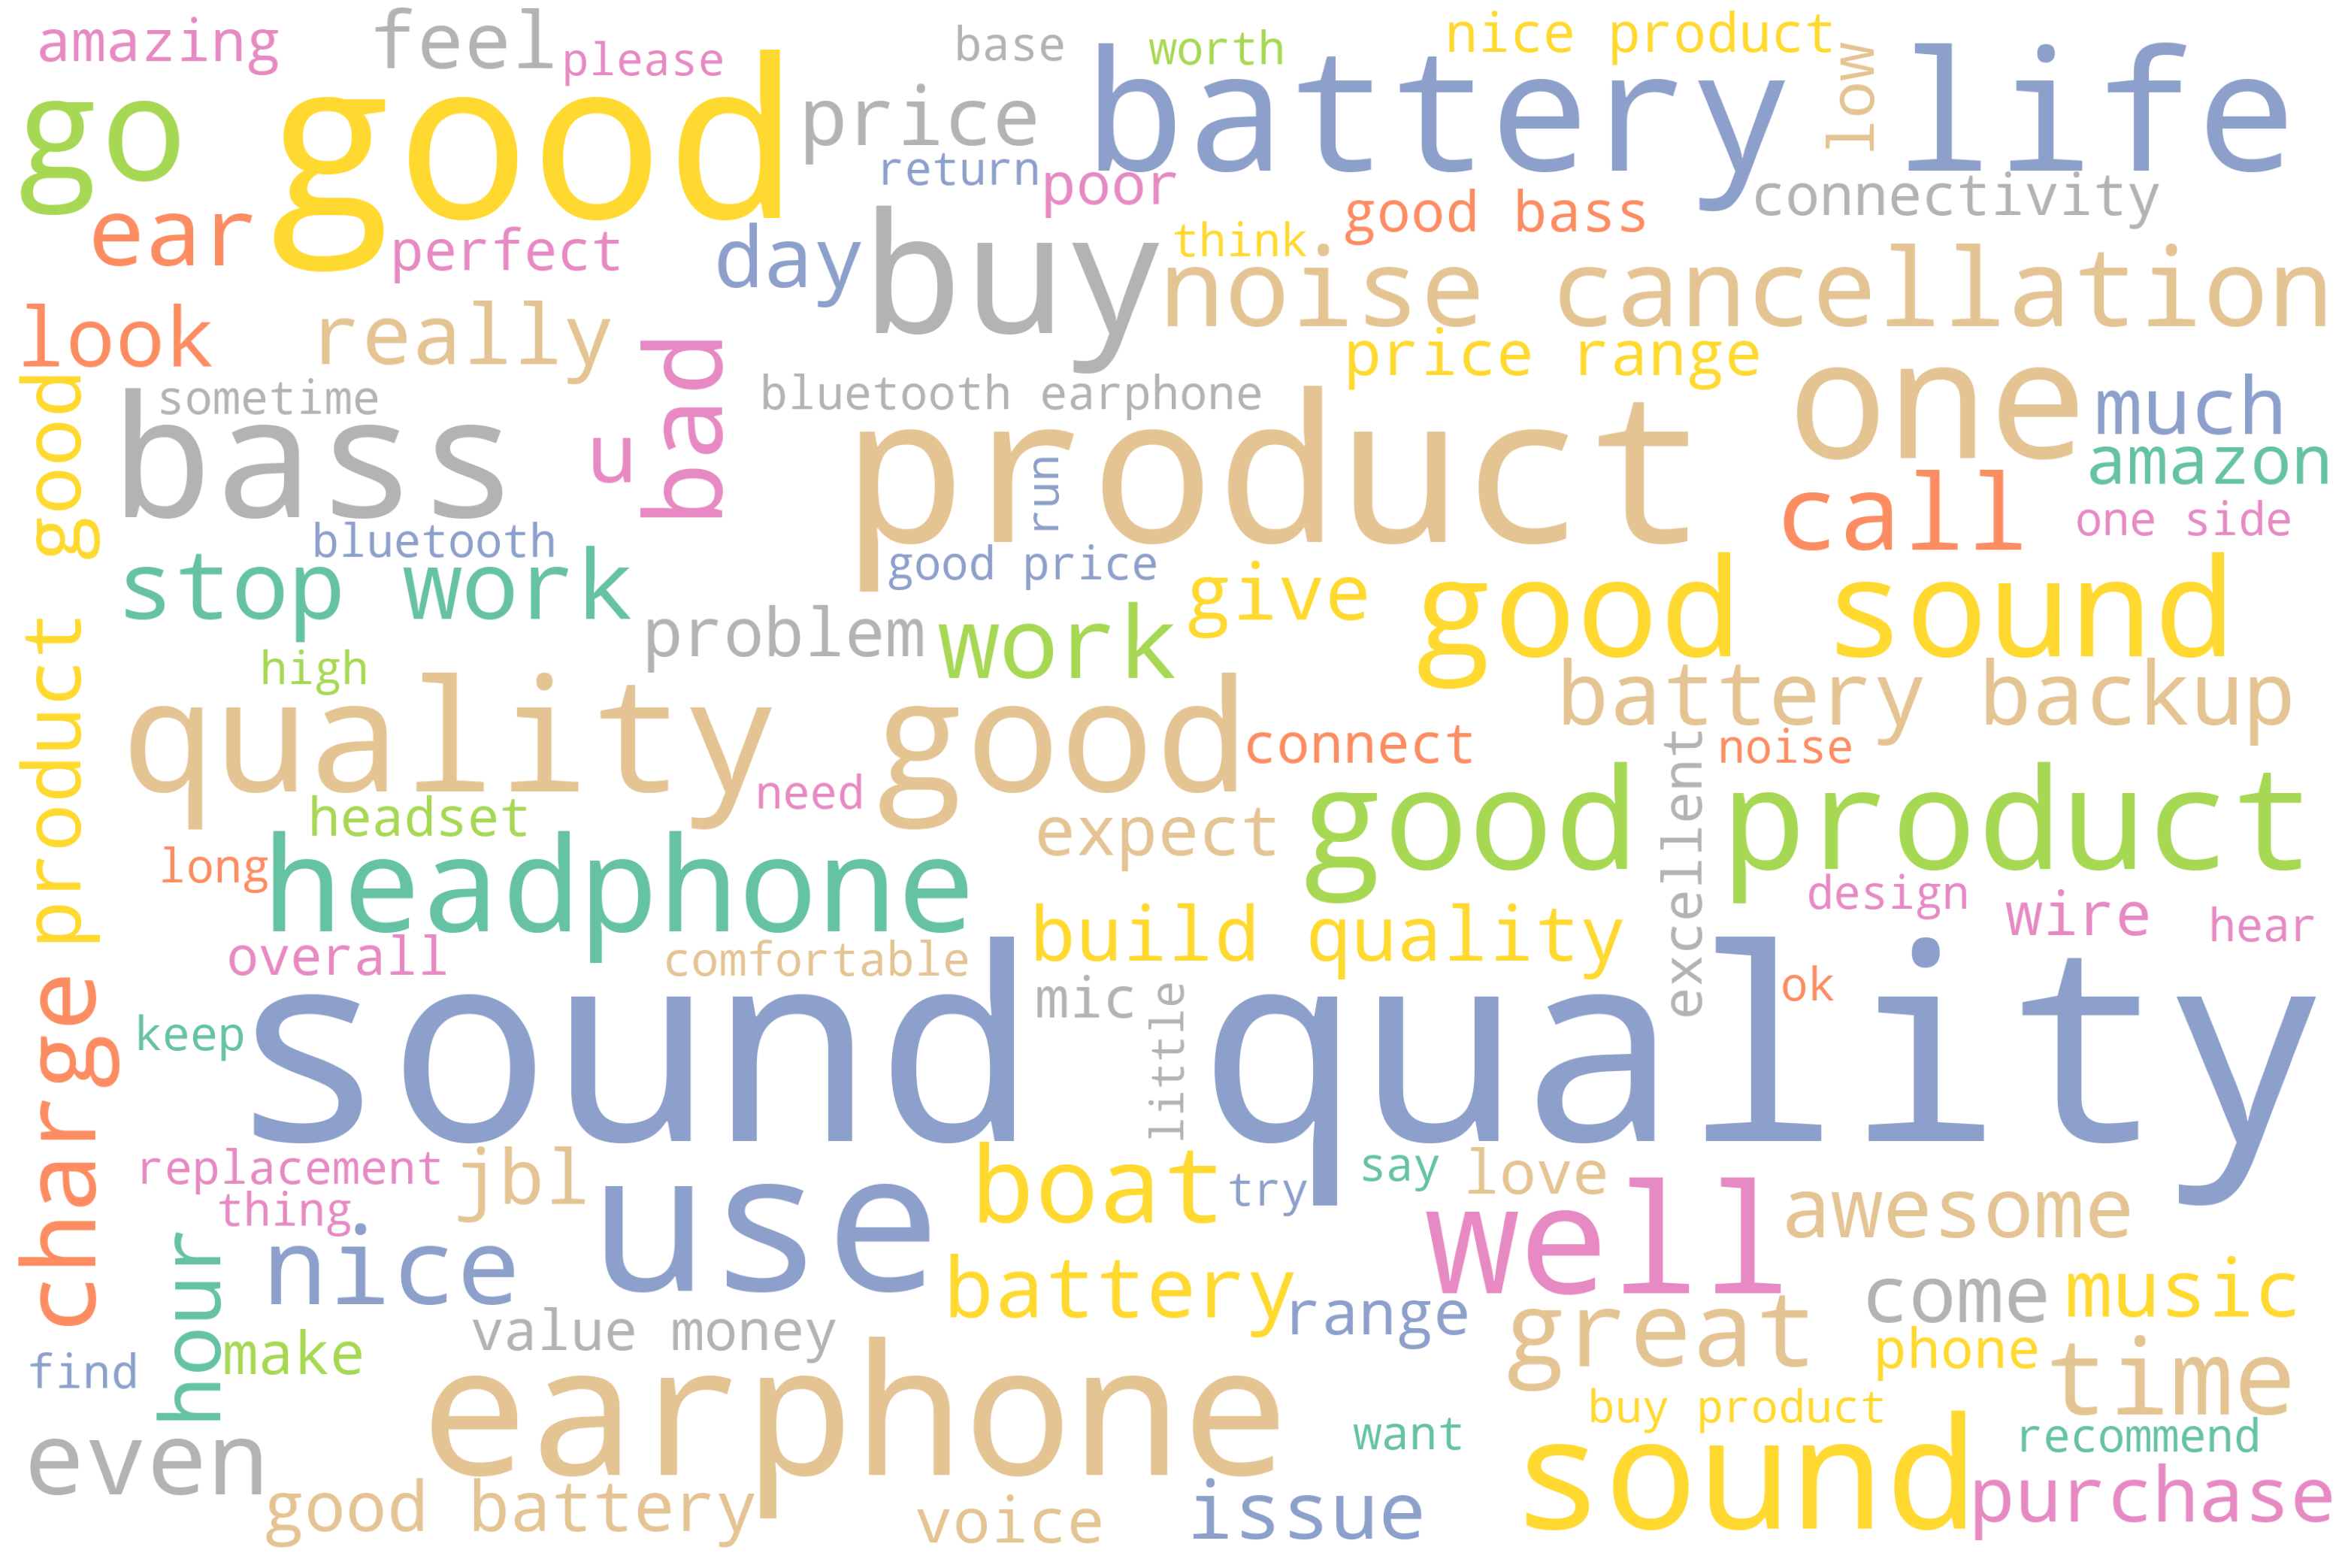

In [55]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [56]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [57]:
for token in doc_block[100:200]:
    print(token,token.pos_)

goodyou PROPN
connect VERB
2 NUM
device NOUN
timei PROPN
connect VERB
laptop PROPN
mobile PROPN
bothwhen NOUN
listen VERB
muaic PROPN
lappy PROPN
u PROPN
get AUX
call NOUN
switch VERB
mobilethis ADJ
switch NOUN
device NOUN
good ADJ
price NOUN
awesomebattery NOUN
stand NOUN
36 NUM
hour NOUN
use NOUN
continously ADV
8 NUM
hour NOUN
one NUM
go VERB
so ADV
battery NOUN
life NOUN
pretty ADV
awesomecomfortable ADJ
ear ADP
its PRON
sound ADJ
quality NOUN
adorable ADJ
overall ADJ
good ADJ
2 NUM
week NOUN
stop VERB
work NOUN
since SCONJ
never ADV
power NOUN
claim NOUN
warrenty ADV
still ADV
undergo VERB
its PRON
awesome ADJ
good ADJ
sound NOUN
quality NOUN
89 NUM
hrs NOUN
battery NOUN
life NOUN
just ADV
waww NOUN
look AUX
😉 NOUN
bring VERB
999 NUM
rupeesbut PROPN
amazon NOUN
package NOUN
system NOUN
very ADV
bad ADJ
very ADV
poor ADJ
packaging VERB
flipcart ADJ
packaging NOUN
system NOUN
much ADV
well ADV
amazon NOUN
after SCONJ
11 NUM
day NOUN
charge NOUN
port NOUN
be AUX
not PART
work NOUN
ca

In [58]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['year', 'warranty', 'day', 'boat', 'send', 'quality455battery', 'life', 'quality', 'lock', 'strap', 'quality', 'earphone', 'wire', 'button', 'quality', 'sound', 'bass', 'balance', 'sorrund', 'effect', 'ear', 'hope', 'connectivity', 'bcz', 'boat', 'basshead', 'connection', 'issue', 'price', 'hope', 'package', 'bubble', 'wrap', 'month', 'usage', 'review', 'talking2', 'use', 'ride', 'bike3', 'music', 'get', 'earphone', 'bass', 'music', 'lover', 'battery', 'life', 'keep', 'go', 'day', 'fact', 'connect', 'laptop', 'phone', 'time', 'switch', 'make', 'experience', 'use', 'lot', 'voice', 'call', 'let', 'buy', 'music', 'lover', 'product', 'durability', 'monthi', 'lose', 'bill', 'detail', 'claim', 'warrenty', 'earphone', 'build', 'quality', 'stop', 'wrke', 'month', 'life', 'span', 'lose', 'want', 'warranty', 'purchase', 'register', 'product', 'boat', 'site', 'replacement', 'warranty', 'sound', 'quality', 'mean', 'compare', 'senheiser', 'use', 'run']


In [59]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0  quality   2814
1  product   2629
2  battery   1530
3    sound   1436
4      use   1267
5     bass   1111
6     work    991
7      buy    869
8    price    869
9     life    746

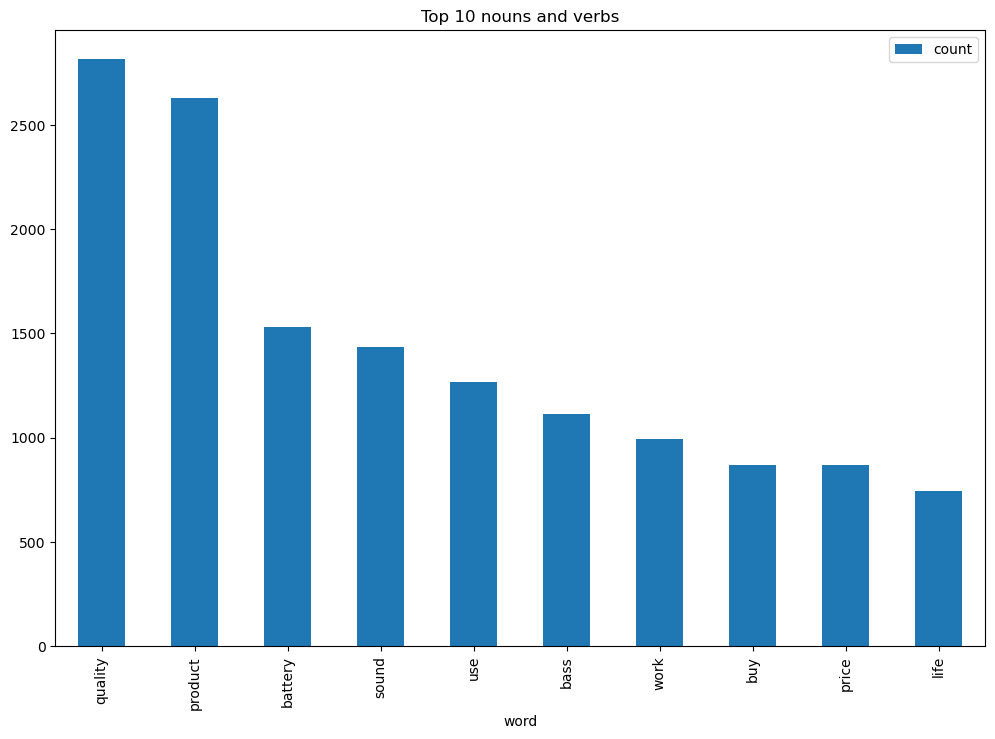

In [60]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [61]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2.',
 'Pain in ear due the conical buds(can be removed)3.',
 'Wires are a bit long which makes it odd in front.4.',
 'No pouch provided.5.',
 'Worst part is very low quality and distoring mic.',
 'Other person keeps complaining about my voice.',
 'This  earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying\u200b this unreliable product.Thanks.',
 'i bought itfor 999,I purchased it second time, gifted first one to brother.',
 'This is really good.Sound quality is really good.You can connect 2 devi

In [62]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0     No doubt it has a great bass and to a great ex...
1     Pain in ear due the conical buds(can be remove...
2     Wires are a bit long which makes it odd in fro...
3                                  No pouch provided.5.
4     Worst part is very low quality and distoring mic.
...                                                 ...
9624                   Flat Cable with decent quality4.
9625  Microphone is noise isolating Very good in goo...
9626                    This jbl awesome sound quality.
9627              I'm so happy after use this earphone.
9628                                  So thank you JBL.

[9629 rows x 1 columns]

In [63]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [64]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [67]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [68]:
# manual testing
calculate_sentiment(text='good service')

3

In [69]:

# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       6
1      -2
2      -2
3      -1
4      -3
       ..
9624    0
9625    6
9626    4
9627    3
9628    2
Name: sentiment_value, Length: 9629, dtype: int64

In [65]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       38
1        9
2       11
3        3
4        9
        ..
9624     5
9625     9
9626     5
9627     7
9628     4
Name: word_count, Length: 9629, dtype: int64

In [70]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       38
1        9
2       11
3        3
4        9
        ..
9624     5
9625     9
9626     5
9627     7
9628     4
Name: word_count, Length: 9629, dtype: int64

In [78]:
sent_df.sort_values(by='sentiment_value',ascending=False)

sentence  word_count  \
8045  Aswome bass  and sound quality is fabelous, mi...         189   
8223  Superb product 👌 Awesome delivery and quality ...         139   
7630  Nice sound quality I have using this for nearl...         262   
6177  Awesome product@reasonable price... Bass is su...         130   
6029  Dont know what happend working really wellBut ...         166   
...                                                 ...         ...   
7579  Very bad product ... bluetooth keeps disconnec...          41   
5532  I was using one month 5 days now it was not co...          89   
2093  What I dislike about this product is the lengt...          93   
2036  Overall worst product from boat,poor connectiv...          43   
58    Bought a memory foam bud pair to use it.Batter...          78   

      sentiment_value  index  
8045               90   8045  
8223               70   8223  
7630               50   7630  
6177               44   6177  
6029               43   6029  
...               ...    ...  
7579              -10   7579  
5532              -11   5532  
2093              -11   2093  
2036              -11   2036  
58                -12     58  

[9629 rows x 4 columns]

In [79]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    9629.000000
mean        2.333472
std         4.566390
min       -12.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        90.000000
Name: sentiment_value, dtype: float64

In [80]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  word_count  \
1     Pain in ear due the conical buds(can be remove...           9   
2     Wires are a bit long which makes it odd in fro...          11   
3                                  No pouch provided.5.           3   
4     Worst part is very low quality and distoring mic.           9   
5        Other person keeps complaining about my voice.           7   
...                                                 ...         ...   
9615                                        Very Handy.           2   
9618                     the product is not turning on.           6   
9619                              Highly disappointing.           2   
9623                  Connectivity & BT range is good3.           6   
9624                   Flat Cable with decent quality4.           5   

      sentiment_value  index  
1                  -2      1  
2                  -2      2  
3                  -1      3  
4                  -3      4  
5                  -2      5  
...               ...    ...  
9615                0   9615  
9618                0   9618  
9619               -2   9619  
9623                0   9623  
9624                0   9624  

[4369 rows x 4 columns]

In [81]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  word_count  \
0     No doubt it has a great bass and to a great ex...          38   
6     This  earphones are unreliable, i bought it be...          64   
7     i bought itfor 999,I purchased it second time,...          13   
8     This is really good.Sound quality is really go...          65   
9     So Battery life is pretty awesome.Comfortable ...           8   
...                                                 ...         ...   
9622  The bass of the product is really good, sound ...          15   
9625  Microphone is noise isolating Very good in goo...           9   
9626                    This jbl awesome sound quality.           5   
9627              I'm so happy after use this earphone.           7   
9628                                  So thank you JBL.           4   

      sentiment_value  index  
0                   6      0  
6                   8      6  
7                   2      7  
8                  13      8  
9                   7      9  
...               ...    ...  
9622                3   9622  
9625                6   9625  
9626                4   9626  
9627                3   9627  
9628                2   9628  

[5260 rows x 4 columns]

In [82]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  word_count  \
0     No doubt it has a great bass and to a great ex...          38   
1     Pain in ear due the conical buds(can be remove...           9   
2     Wires are a bit long which makes it odd in fro...          11   
3                                  No pouch provided.5.           3   
4     Worst part is very low quality and distoring mic.           9   
...                                                 ...         ...   
9624                   Flat Cable with decent quality4.           5   
9625  Microphone is noise isolating Very good in goo...           9   
9626                    This jbl awesome sound quality.           5   
9627              I'm so happy after use this earphone.           7   
9628                                  So thank you JBL.           4   

      sentiment_value  index  
0                   6      0  
1                  -2      1  
2                  -2      2  
3                  -1      3  
4                  -3      4  
...               ...    ...  
9624                0   9624  
9625                6   9625  
9626                4   9626  
9627                3   9627  
9628                2   9628  

[9629 rows x 4 columns]

<Axes: xlabel='sentiment_value', ylabel='Density'>

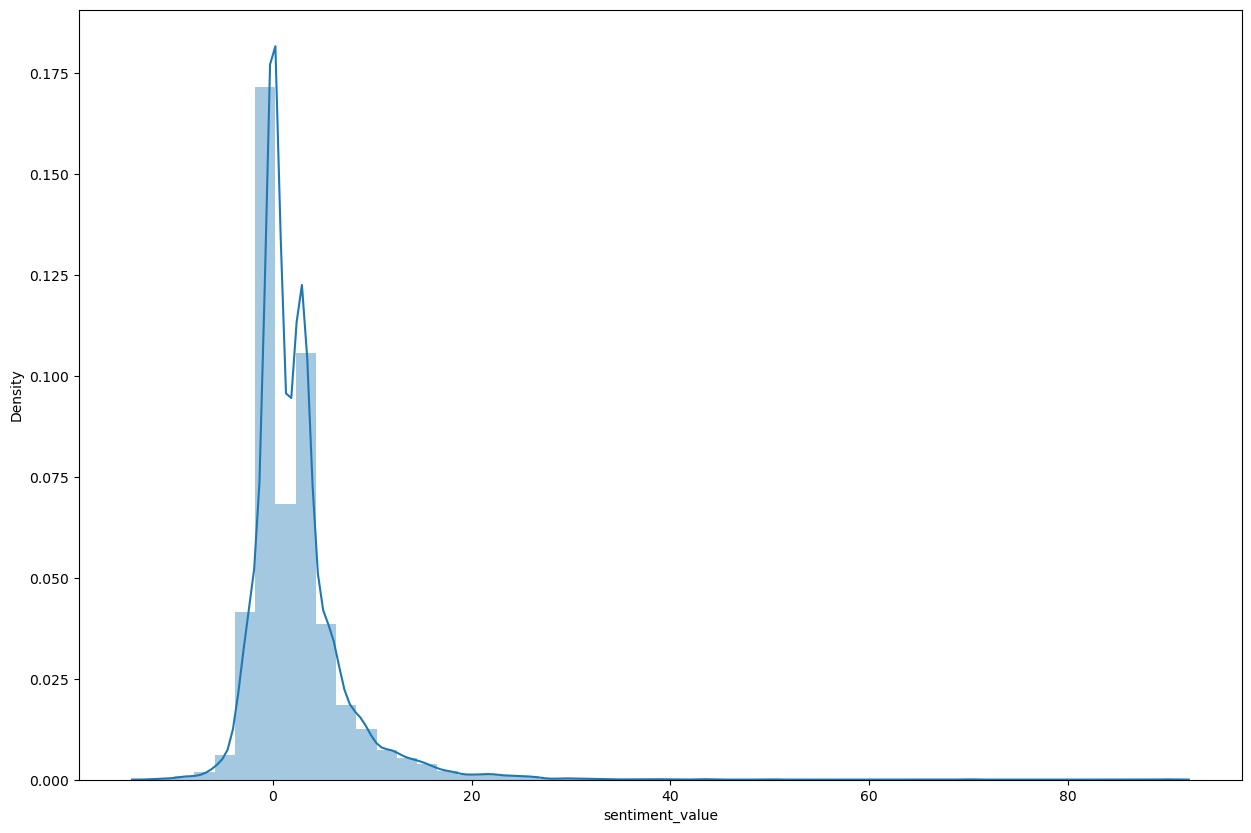

In [85]:
# Plotting the sentiment value for whole review
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

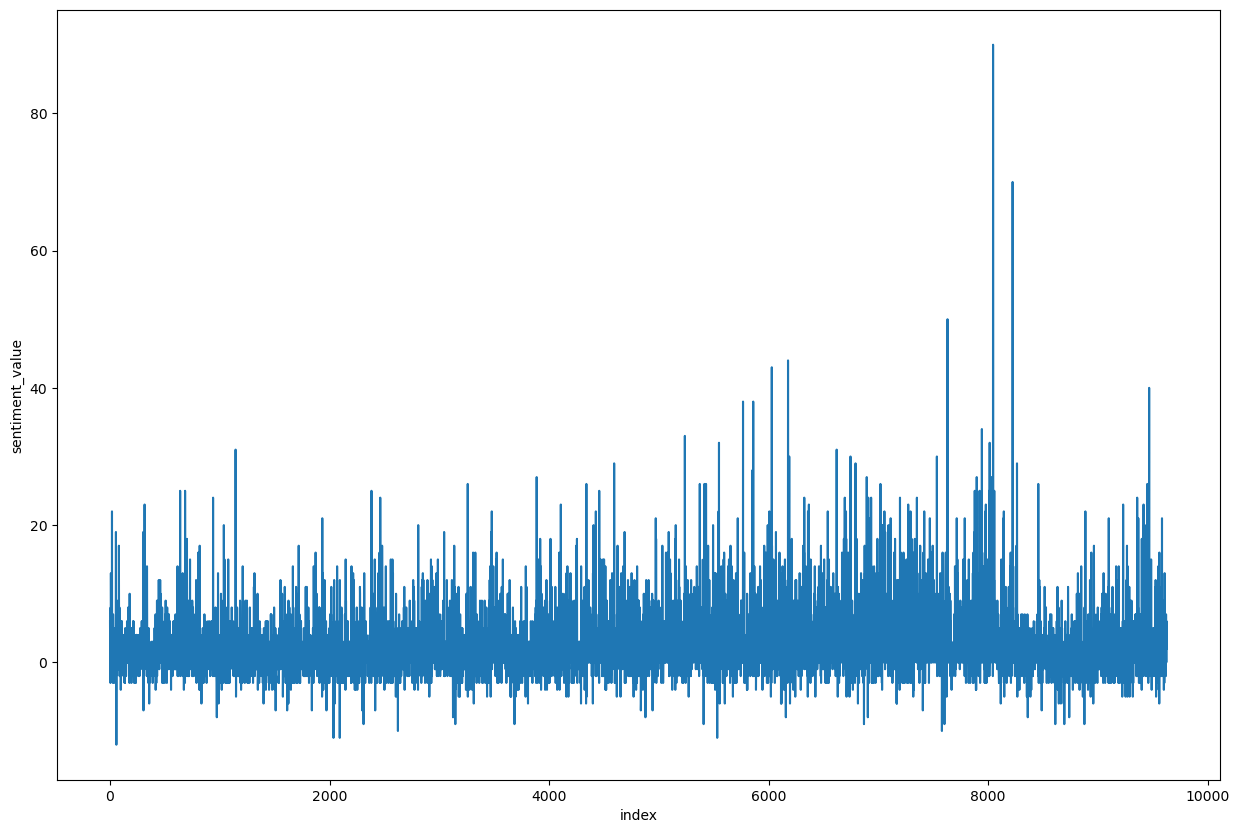

In [86]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)